In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler

In [2]:
import os
os.getcwd()

'C:\\Users\\Cactus jack'

In [3]:
!pip install pandas

In [8]:
data = pd.read_csv('archive.zip')
data['amount'] = ['3', '1', '1', '3', '3', '1', '3', '3', '1', '1', '2', '1', '1', '1', '2', '1', '1', '3', '1', '1', '1', '3', '1', '1', '1', '1','1', '3','3', '1', '3', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '3', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '5', '5', '3', '1', '1', '1', '1', '4', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '3', '1', '7', '1', '1','1','1','3','3','1']
data['troop_type'] = ['2', '2', '4', '2', '2', '4', '1', '2', '4', '2', '2', '4', '4', '4', '2', '4', '2', '1', '2', '3', '4', '2', '3', '1', '2', '4', '2', '2', '2', '4', '2', '4', '2', '2', '2', '2', '2', '2', '3', '3', '4', '2', '2', '2', '2', '2', '3', '1', '3', '2', '3', '1', '2', '4', '2', '4', '2', '2', '1', '2', '2', '2', '1', '2', '2', '3', '3', '2', '2', '2', '2', '1', '2', '3', '1', '2', '2', '4', '2', '2', '4', '3', '2','4','3','2','2','2','3','2','1','2','2','2','4']
# For troop_type: 1 = flying troop, 2 = ground troop, 3 = building, 4 = spell
columns = ['elixir','amount','troop_type','name','level1','hitpoints1','damage1','level2','hitpoints2','damage2','level3',
                        'hitpoints3','damage3','level4','hitpoints4','damage4','level5','hitpoints5',
                           'damage5','level6','hitpoints6','damage6','level7','hitpoints7','damage7',
                          'level8','hitpoints8','damage8']

In [9]:
df = pd.DataFrame(data, columns=columns)
df

,elixir,amount,troop_type,name,level1,hitpoints1,damage1,level2,hitpoints2,damage2,...,damage5,level6,hitpoints6,damage6,level7,hitpoints7,damage7,level8,hitpoints8,damage8
0,1,3,2,Skeletons,1,32.0,96.0,2,35.0,105.0,...,138.0,6,51.0,153.0,7,56.0,168.0,8,61.0,183.0
1,1,1,2,Ice Spirit,1,90.0,43.0,2,99.0,47.0,...,62.0,6,144.0,68.0,7,158.0,75.0,8,173.0,82.0
2,1,1,4,Heal,1,0.0,0.0,2,0.0,0.0,...,0.0,6,0.0,0.0,7,0.0,0.0,8,0.0,0.0
3,2,3,2,Goblins,1,79.0,141.0,2,86.0,153.0,...,204.0,6,126.0,225.0,7,139.0,246.0,8,152.0,270.0
4,2,3,2,Spear Goblins,1,52.0,96.0,2,57.0,105.0,...,138.0,6,83.0,153.0,7,91.0,168.0,8,100.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,7,1,1,Lava Hound,1,0.0,0.0,2,0.0,0.0,...,0.0,6,0.0,0.0,7,0.0,0.0,8,0.0,0.0
91,7,1,2,Mega Knight,1,0.0,0.0,2,0.0,0.0,...,0.0,6,0.0,0.0,7,0.0,0.0,8,0.0,0.0
92,8,3,2,Golem,1,0.0,0.0,2,0.0,0.0,...,0.0,6,3200.0,195.0,7,3520.0,214.0,8,3872.0,235.0
93,9,3,2,Three Musketeers,1,0.0,0.0,2,0.0,0.0,...,372.0,6,452.0,408.0,7,496.0,450.0,8,544.0,492.0


In [10]:
data.name

0            Skeletons
1           Ice Spirit
2                 Heal
3              Goblins
4        Spear Goblins
            ...       
90          Lava Hound
91         Mega Knight
92               Golem
93    Three Musketeers
94              Mirror
Name: name, Length: 95, dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   95 non-null     int64  
 1   id           95 non-null     object 
 2   elixir       95 non-null     int64  
 3   link         95 non-null     object 
 4   name         95 non-null     object 
 5   level1       95 non-null     int64  
 6   hitpoints1   95 non-null     float64
 7   damage1      95 non-null     float64
 8   level2       95 non-null     int64  
 9   hitpoints2   95 non-null     float64
 10  damage2      95 non-null     float64
 11  level3       95 non-null     int64  
 12  hitpoints3   95 non-null     float64
 13  damage3      95 non-null     float64
 14  level4       95 non-null     int64  
 15  hitpoints4   95 non-null     float64
 16  damage4      95 non-null     float64
 17  level5       95 non-null     int64  
 18  hitpoints5   95 non-null     float64
 19  damage5   

In [12]:
df.describe

<bound method NDFrame.describe of     elixir amount troop_type              name  level1  hitpoints1  damage1  \
0        1      3          2         Skeletons       1        32.0     96.0   
1        1      1          2        Ice Spirit       1        90.0     43.0   
2        1      1          4              Heal       1         0.0      0.0   
3        2      3          2           Goblins       1        79.0    141.0   
4        2      3          2     Spear Goblins       1        52.0     96.0   
..     ...    ...        ...               ...     ...         ...      ...   
90       7      1          1        Lava Hound       1         0.0      0.0   
91       7      1          2       Mega Knight       1         0.0      0.0   
92       8      3          2             Golem       1         0.0      0.0   
93       9      3          2  Three Musketeers       1         0.0      0.0   
94       0      1          4            Mirror       1         0.0      0.0   

    level2  hitpo

<Axes: >

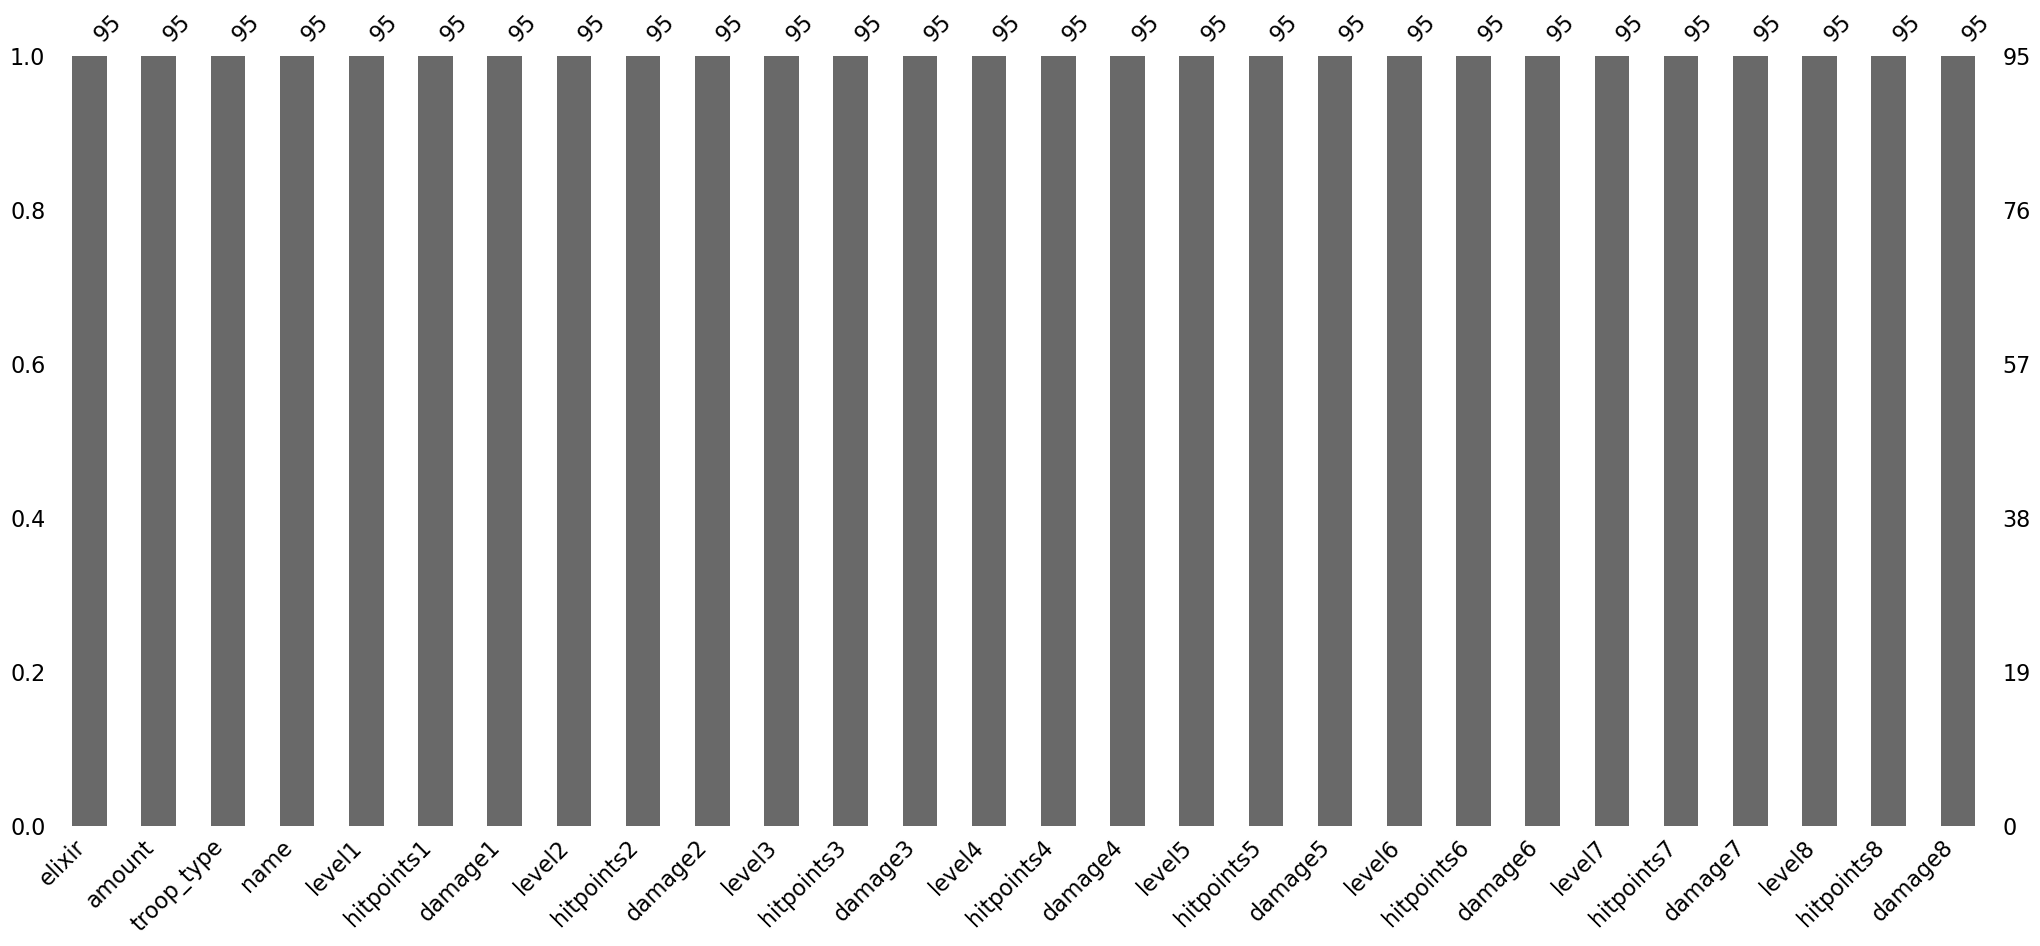

In [13]:
msno.bar(df)

In [14]:
X = df.drop(['elixir','name'], axis=1).copy()
y = df['elixir'].copy()

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)

In [16]:
X_scaled

array([[ 1.33789981, -0.45021317,  0.        , ...,  0.        ,
        -0.72158279, -0.29796929],
       [-0.4908841 , -0.45021317,  0.        , ...,  0.        ,
        -0.57336579, -0.59528785],
       [-0.4908841 ,  1.74313304,  0.        , ...,  0.        ,
        -0.80230813, -0.8366752 ],
       ...,
       [ 1.33789981, -0.45021317,  0.        , ...,  0.        ,
         4.32176552, -0.14489438],
       [ 1.33789981, -0.45021317,  0.        , ...,  0.        ,
        -0.08239695,  0.6116489 ],
       [-0.4908841 ,  1.74313304,  0.        , ...,  0.        ,
        -0.80230813, -0.8366752 ]])

In [17]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,y,train_size=.9,random_state=10)
print(f"Train size: {round(len(X_train_scaled) / len(X) * 100)}% \n\
Test size: {round(len(X_test_scaled) / len(X) * 100)}%")

Train size: 89% 
Test size: 11%


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

logisitic_regression = LogisticRegression()
svm = SVC()
tree = RandomForestClassifier()

logisitic_regression.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
tree.fit(X_train_scaled, y_train)

log_reg_preds = logisitic_regression.predict(X_test_scaled)
svm_preds = svm.predict(X_test_scaled)
tree_preds = tree.predict(X_test_scaled)

In [19]:
from sklearn.metrics import classification_report

model_preds = {
    "Logistic Regression": log_reg_preds,
    "Support Vector Machine": svm_preds,
    "Random Forest": tree_preds
}

for model, preds in model_preds.items():
    print(f"{model} Results:\n{classification_report(y_test, preds, zero_division=1)}", sep="\n\n")

Logistic Regression Results:
              precision    recall  f1-score   support

           2       1.00      0.00      0.00         1
           3       0.60      1.00      0.75         3
           4       0.50      0.67      0.57         3
           5       1.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           8       1.00      0.00      0.00         1

    accuracy                           0.50        10
   macro avg       0.68      0.28      0.22        10
weighted avg       0.63      0.50      0.40        10

Support Vector Machine Results:
              precision    recall  f1-score   support

           2       1.00      0.00      0.00         1
           3       0.50      0.67      0.57         3
           4       0.50      0.67      0.57         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           8       1.00      0.00      0.00         1

    accuracy    

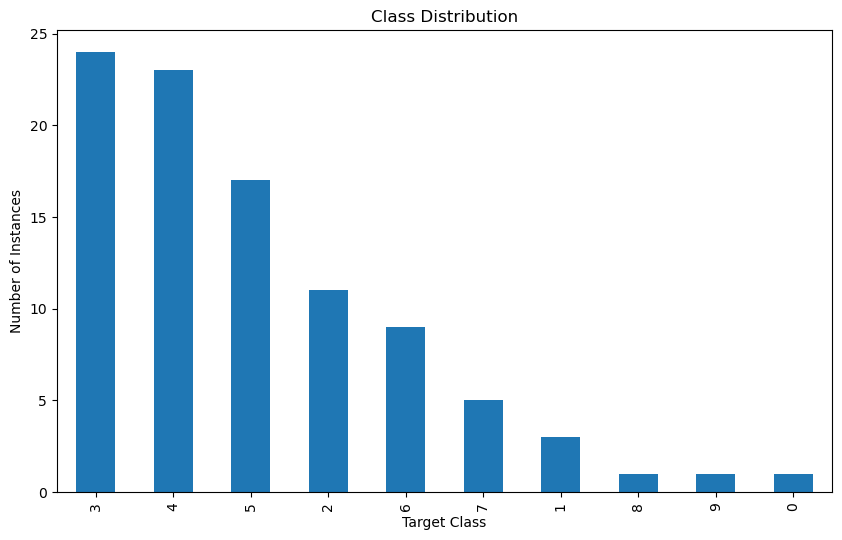

In [20]:
import matplotlib.pyplot as plt

class_distribution = df['elixir'].value_counts()

plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Number of Instances')
plt.show()

In [22]:
data.columns

Index(['Unnamed: 0', 'id', 'elixir', 'link', 'name', 'level1', 'hitpoints1',
       'damage1', 'level2', 'hitpoints2', 'damage2', 'level3', 'hitpoints3',
       'damage3', 'level4', 'hitpoints4', 'damage4', 'level5', 'hitpoints5',
       'damage5', 'level6', 'hitpoints6', 'damage6', 'level7', 'hitpoints7',
       'damage7', 'level8', 'hitpoints8', 'damage8', 'level9', 'hitpoints9',
       'damage9', 'level10', 'hitpoints10', 'damage10', 'level11',
       'hitpoints11', 'damage11', 'level12', 'hitpoints12', 'damage12',
       'level13', 'hitpoints13', 'damage13', 'level14', 'hitpoints14',
       'damage14', 'amount', 'troop_type'],
      dtype='object')

In [23]:
data.index

RangeIndex(start=0, stop=95, step=1)

In [24]:
data = pd.read_csv('archive.zip')
print(f"DataFrame shape: {data.shape}")

DataFrame shape: (95, 47)
